In [ ]:
from google.colab import drive
import random
import os
import json
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, precision_recall_curve, auc

### 1. Load Feature and Targets Data

In [ ]:
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
DATA_DIR = '/content/drive/My Drive/CS6140_final_project/Data/'
FEATURES_LOC = os.path.join(DATA_DIR, 'features_data/', '24_LogReg_features_matrix.json')
TARGETS_LOC = os.path.join(DATA_DIR, 'targets_data/', 'targets_dict_anyfailure_24hrfeaturewindow_6hrlookahead.json')

In [ ]:
with open(FEATURES_LOC, mode = 'r') as json_f:
    X = json.load(json_f)
print(f"- {format(len(X), ',')} total rows in features matrix.")

with open(TARGETS_LOC, mode = 'r') as json_f:
    y = json.load(json_f)
print(f"- {format(len(y), ',')} total rows in labels vector.")

- 36,500 total rows in features matrix.
- 36,500 total rows in labels vector.


In [ ]:
# Converting X and y into a numpy matrix and numpy vector, respectively.
X = np.array(X)
y = np.array(list(y.values()))
print("X:", X.shape)
print("y:", y.shape)

X: (36500, 45)
y: (36500,)


### 2. Define Model

In [ ]:
def train_logistic_regression(X: np.ndarray, y: np.ndarray, test_size: float = 0.2, random_state: int = 42) -> LogisticRegression:
    """
    Train a logistic regression model on the given data.

    Parameters:
    X: Features matrix.
    y: Labels vector.
    test_size (optional): Proportion of the dataset to include in the test split. Default is 0.2.
    random_state (optional): Random state for reproducibility. Default is 42.

    Returns:
    sklearn.linear_model.LogisticRegression: Trained logistic regression model.
    """

    # Splitting the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size, random_state = random_state, stratify = y)

    # Scale the data
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Initializing the logistic regression model
    log_reg_model = LogisticRegression(class_weight = 'balanced', max_iter = 1000, random_state = random_state)

    # Training the model using scaled features
    log_reg_model.fit(X_train_scaled, y_train)

    # Making predictions on the test set
    y_pred = log_reg_model.predict(X_test_scaled)

    # Evaluating the model
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy:", accuracy)

    # Printing a classification report for more detailed evaluation
    print(classification_report(y_test, y_pred))

    return log_reg_model, X_test, y_test

### 3. Run Model

In [ ]:
log_reg_model, X_test, y_test = train_logistic_regression(X, y)

Accuracy: 0.9010958904109589
              precision    recall  f1-score   support

           0       1.00      0.90      0.95      7160
           1       0.15      0.91      0.26       140

    accuracy                           0.90      7300
   macro avg       0.58      0.91      0.60      7300
weighted avg       0.98      0.90      0.93      7300



### 4. Evaluate Model

In [ ]:
def plot_roc_curve(y_test, y_pred_prob):
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.5f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()

def plot_precision_recall_curve(y_test, y_pred_prob):
    precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)
    pr_auc = auc(recall, precision)

    plt.figure(figsize=(8, 6))
    plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve (area = %0.5f)' % pr_auc)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend()
    plt.show()

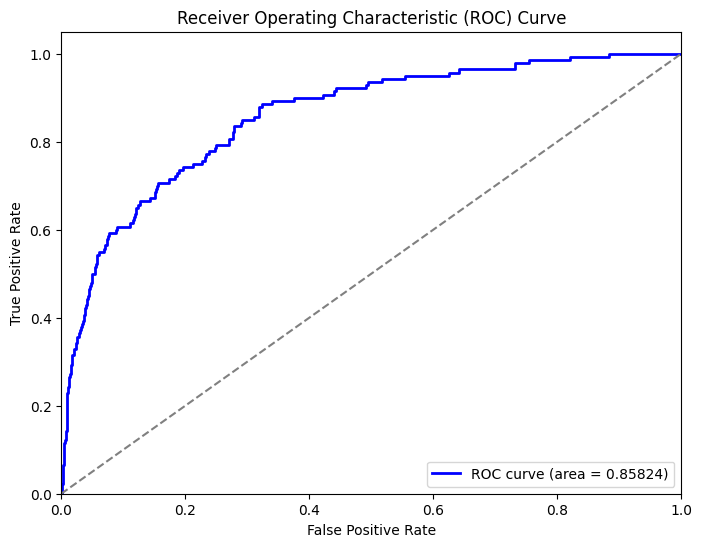

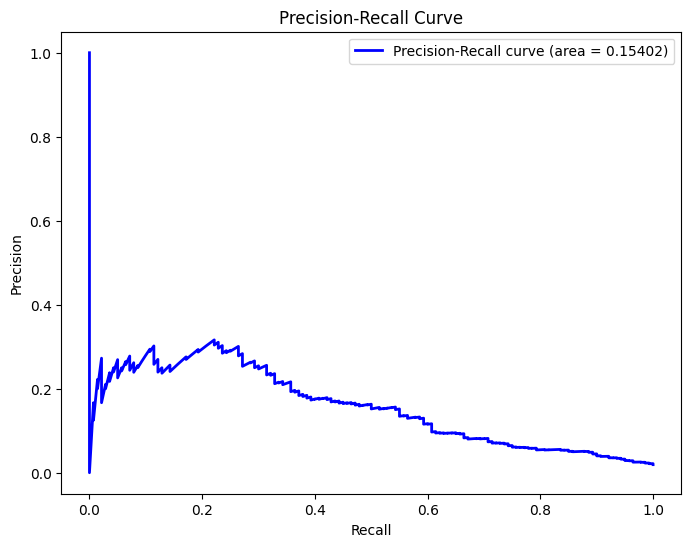

In [ ]:
# Obtain y_pred_prob
y_pred_prob = log_reg_model.predict_proba(X_test)[:, 1]

# Plot ROC curve
plot_roc_curve(y_test, y_pred_prob)

# Plot precision-recall curve
plot_precision_recall_curve(y_test, y_pred_prob)